In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(df['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

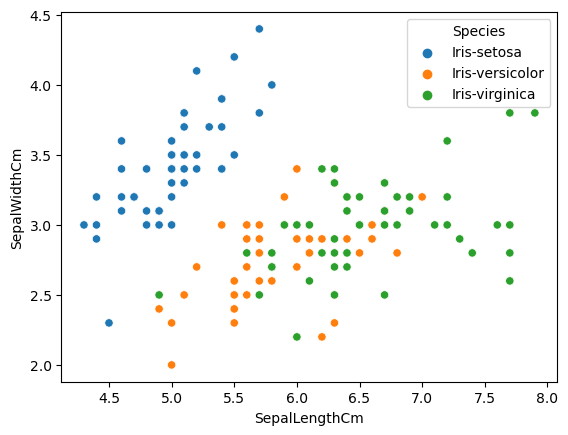

In [5]:
sns.scatterplot(data = df, x="SepalLengthCm", y="SepalWidthCm", hue = "Species")

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

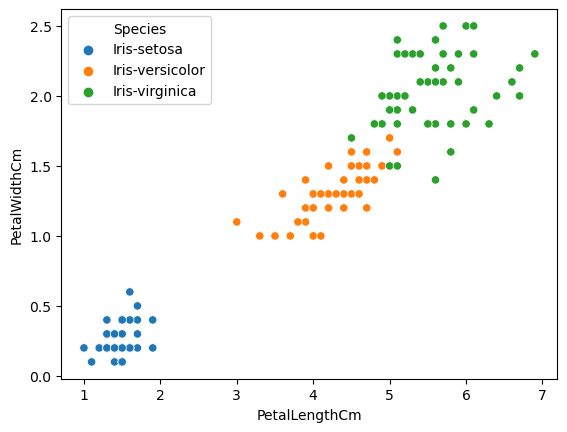

In [6]:
sns.scatterplot(data = df, x="PetalLengthCm", y="PetalWidthCm", hue = "Species")

In [7]:
df.sort_values(by="PetalLengthCm", ascending=True)
df.reset_index(drop=True, inplace=True)

In [8]:
#get data
#human pick values that seem like they would split the data fairly well
#human pick a change value that makes sense based on the data
#Calculate the Gini impurity(or similear) of those values
#Change the values by the human picked change value
#Calculate the Gini impurity(or similear) of those values
#Repeat until the accuracy declines

#1-(prob of yes)^2 - (prob of no)^2
#(current node pop / total pop) * gini

In [12]:
def trainTree(df):
    trees = {}
    setosa = [0,0] #yes, no
    virginica = [0,0]
    versicolor = [0,0]
    treeNum = 1
    for i in range(len(df)):
        treeNum = i
        trees[i] = [setosa, virginica, versicolor]
        if df.iloc[i]['PetalLengthCm'] <= 2.5:
            if df.iloc[i]['Species'] == 'Iris-setosa':
                trees[treeNum][0][0] = trees[treeNum][0][0] + 1
            else:
                trees[treeNum][0][1] = trees[treeNum][0][1] + 1
        else:
            boundary = getNextBoundary(i, df)
            if df.iloc[i]["PetalLengthCm"] <= boundary:
                if df.iloc[i]["Species"] == 'Iris-versicolor':
                    trees[treeNum][2][0] = trees[treeNum][2][0] + 1
                else:
                    trees[treeNum][2][1] = trees[treeNum][2][1] + 1
            else:
                if df.iloc[i]["Species"] == 'Iris-virginica':
                    trees[treeNum][1][0] = trees[treeNum][1][0] + 1
                else:
                    trees[treeNum][1][1] = trees[treeNum][1][1] + 1
        treeNum += 1

In [17]:
def getNextBoundary(i, df):
    if i < len(df):
        first = df.iloc[i]["PetalLengthCm"]
        second = df.iloc[i+1]["PetalLengthCm"]
        return ((first+second)/2)
    else:
        return (df.iloc[i-1]["PetalLengthCm"] + df.iloc[i]["PetalLengthCm"] / 2)

In [18]:
trainTree(df)

IndexError: single positional indexer is out-of-bounds